<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/7c_Text_Preprocessing_TfIdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import codecs
%matplotlib inline

Dataset from kaggle:

https://www.kaggle.com/datasets/venky73/spam-mails-dataset?select=spam_ham_dataset.csv

abbiamo visto come trasformare i valori numerici con gli scaler, e come trasformare i valori categorici (con lable encoder, one hot encoder ecc...). abbiamo visto nelle lezioni di teorica su come trasformare il testo. abbiamo parlato di embadding. ci sono diversi modelli di linguaggio per trasformare il testo in embadding (come per es worthvec). un altro modo per trasforamre il testo è utilizzare term frequency e inverse document frequency (anche solo term frequency basta).
lo si può fare in python con una libreria specifica

tf-df può essere inserito all'interno della pipeline

## Loading the dataset

In [ ]:
df = pd.read_csv("spam_ham_dataset.csv", index_col=0)

In [ ]:
df #dataset di email formato dal testo di una mail e un etichetta che indica se la mail è di spam o meno (etichetta trasformata anche in numerica con 0 se non è spam e 1 se spam)


,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df.shape

(5171, 3)

In [ ]:
df["label_num"].value_counts()

,count
label_num,
0,3672
1,1499


In [ ]:
df['text'][12]

'Subject: 2 nd rev dec . 1999 josey ranch nom\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by susan d trevino / hou / ect on 12 / 15 / 99 08 : 41\r\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nbob withers on 12 / 15 / 99 08 : 28 : 08 am\r\nto : susan d trevino / hou / ect @ ect\r\ncc : stretch brennan , kevin mclarney ,\r\n" \' taylor vance ( e - mail ) \' "\r\nsubject : 2 nd rev dec . 1999 josey ranch nom\r\nhere \' s revised december 1999 ( effective 12 / 15 / 99 ) setup for\r\njosey : ( using 1 . 081 btu / mcf )\r\n* gas deliveries into hpl\r\n9 , 300 mmbtu / d for kri ( net reduction of\r\n3 , 000 mmbtu / d )\r\n9 , 300 mmbtu / d into hpl\r\nbob withers > <\r\nkcs energy , 5555 san felipe , suite 1200\r\nhouston , tx 77056\r\nvoice mail / page 713 - 964 - 9434'

In [ ]:
def remove_line_break(text):
    # Removes all line breaks
    for sign in '\r\n':
        text = text.replace(sign, " ")
    return text

In [ ]:
df["text"]=df["text"].apply(remove_line_break)

In [ ]:
df['text'][12]

'Subject: 2 nd rev dec . 1999 josey ranch nom  - - - - - - - - - - - - - - - - - - - - - - forwarded by susan d trevino / hou / ect on 12 / 15 / 99 08 : 41  am - - - - - - - - - - - - - - - - - - - - - - - - - - -  bob withers on 12 / 15 / 99 08 : 28 : 08 am  to : susan d trevino / hou / ect @ ect  cc : stretch brennan , kevin mclarney ,  " \' taylor vance ( e - mail ) \' "  subject : 2 nd rev dec . 1999 josey ranch nom  here \' s revised december 1999 ( effective 12 / 15 / 99 ) setup for  josey : ( using 1 . 081 btu / mcf )  * gas deliveries into hpl  9 , 300 mmbtu / d for kri ( net reduction of  3 , 000 mmbtu / d )  9 , 300 mmbtu / d into hpl  bob withers > <  kcs energy , 5555 san felipe , suite 1200  houston , tx 77056  voice mail / page 713 - 964 - 9434'

In [ ]:
df['lenght'] = df['text'].apply(lambda x: len(x))

<Axes: >

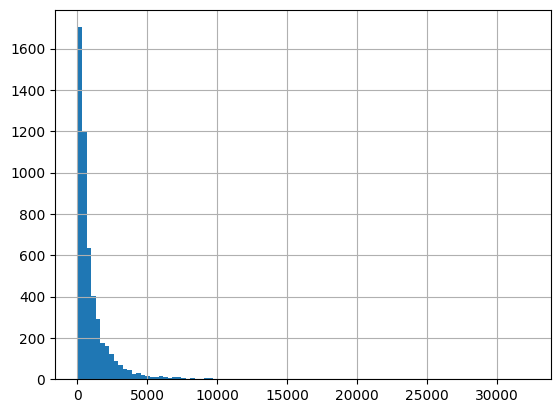

In [ ]:
df['lenght'].hist(bins=100)

##Using TF

### Unigrams

sulla base del testo posso allenare un modello che indichi se la mail è di spam o di meno. come trasformare il testo? lo posso fare con un counter dei diversi termini che compaiono. prendo il testo lo divido in parole e poi costruisco una matrice in cui ogni riga dell amatrice è un documanto diverso (doc 1, 2 ecc..) e ogni feature della matrice è una parole diversa. ogni colonna è una diversa parole che compare nella mail. gli elementi della matrice sono il numero di volte in cui la parola compare nel documento. con questo count vectorizer vado a trasformare il testo nella matrice. count vectorizer fa sempre parte dei trasfromrmatori di sklearn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,
                             stop_words = None, max_features = 15000) #count vectorizer può prendere come token una parola oppure i caratteri (per cui le feature della matrice sono caratteri)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vectorizer.get_feature_names_out() #le feature della matrice sono le parole che compaiono nella mail ordinate in ordine alfabetico

array(['00', '000', '0000', ..., 'zwiers', 'zxgwvpimicrosoft', 'zyban'],
      dtype=object)

In [ ]:
vectorizer.get_feature_names_out()[1000:1010]

array(['54', '540', '541', '542', '5427', '544', '545', '547', '547201',
       '548'], dtype=object)

In [ ]:
vectorizer.get_feature_names_out()[10000:10010]

array(['moval', 'move', 'moved', 'movement', 'moves', 'movie', 'movies',
       'moving', 'mozilla', 'mp'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

una volta che ho trasformato i dati inizializzo un modello divido il dataset in train e test e inizializzo un classificatore sulla porzione di training che sarà formato da un matrice + il target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 314026 stored elements and shape (3878, 15000)>

In [ ]:
mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) #alleno il modello
clf=mnb.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, mnb.predict(X_test)) #vedo le predizioni del modello sul test. in questo caso visto che le mail di spam sono meno rispetto a quelle di no l'accuracy non è la migliore ma sarebbe meglio valutare anche conusion matrix, precison, recall e f1 score.

0.9659706109822119

miglioramenti approccio:
1. tra le parole della matrice ci saranno parole che si ripetono molto spesso come per es gli articoli. e l'articolo non è una parola che aggiunge significato alla mail quindi potremmo consdierarli come non rilevanti. sono quelle che vengono dette stop_words, elimino queste parole dalla matrice

### Unigrams without stop words

In [ ]:
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,
                             stop_words="english",max_features = 15000) #intervengo sull'inizializzazione del count vectorizer, indico le stop_words da eliminare. dando in input la lingua in cui sono scritte le mail il trasformatore ha una lista di parole stop_word per la lingua
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.shape

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

###Bigrams without stop words

In [ ]:
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,
                             stop_words="english", ngram_range=(2,2))
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.shape

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

### N-grams (1)

In [ ]:
vectorizer = CountVectorizer(analyzer = "char_wb",tokenizer = None,
                             preprocessor = None,stop_words = None,max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.shape

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

### N-grams (2)

In [ ]:
vectorizer = CountVectorizer(analyzer = "char_wb",tokenizer = None,preprocessor = None,
                             stop_words = None, ngram_range=(2,2), max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.shape

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

### N-grams (3)

In [ ]:
vectorizer = CountVectorizer(analyzer = "char_wb",tokenizer = None,preprocessor = None,stop_words = None,
                             ngram_range=(3,3), max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

###N-grams (4)

In [ ]:
vectorizer = CountVectorizer(analyzer = "char_wb",tokenizer = None,preprocessor = None,stop_words = None,
                             ngram_range=(4,4), max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

###N-grams (5)

In [ ]:
vectorizer = CountVectorizer(analyzer = "char_wb",tokenizer = None,preprocessor = None,stop_words = None,
                             ngram_range=(5,5), max_features = 30000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

## Using TF-IDF

2. anzi che avrere nella matrice il numero di volte in cui la parola compare nel document. anzi che avere la term_frequency posso metterci term_frequency * inverse document freqeuncy. supponiamo che queste siano tutte le term frequency della mail, la parola subject compare in uttte le mail, significa che questa non è rilevante per determinare se la mail è di spam o meno. sostituendo quindi la term frequency con term frequency * inverse document frequency vado a dare più imporatanza a parole che compaiono molto in una determina mail e poco nell'intera collezione di documenti. peso la term frequency con la sua frequenza all'interno di tutta la collezione di documenti. fa in modo che una parola che compare tanto in un doc ma anche in tutti siamo meno imporatante di una che compare molto in un doc ma poco in tutti. si dice TF-DF vectorizer

###Unigrams

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = "word", tokenizer = None,preprocessor = None,stop_words = None,max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
data_text.toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

###N-grams (5)

In [ ]:
vectorizer = TfidfVectorizer(analyzer = "char_wb",tokenizer = None,preprocessor = None,stop_words = None,
                             ngram_range=(5,5), max_features = 30000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))